Mean of Erosion Volsum over count: -0.4613568858260869
Standard Deviation of Erosion Volsum over count: 0.2540678431371887
Mean Squared Error: 0.02637278858669655
Correlation: 0.7923879652319363
Number of training samples: 135
Number of testing samples: 46


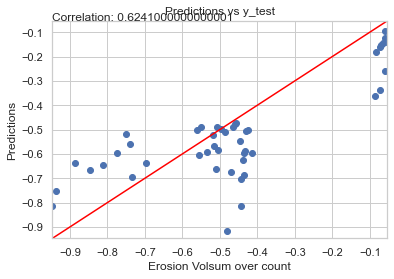

In [35]:
import RF_utils as rfut
from RF_feature_importance import evaluate_model_with_shap, evaluate_feature_with_shap  # Assuming SHAP evaluation is defined here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.inspection import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# Load your data (modify this part with real data loading)
csv_fn = r"Y:\ATD\GIS\East_Troublesome\Watershed Statistical Analysis\Watershed Stats\Hillslopes\Stream Clipped Hillslopes Pruned\Hillslope_Stats_Combined 050224.csv"
variables_to_exclude = ['ID', 'Erosion mean', "Category",	"OBJECTID", "Deposition mean",	"Deposition stdev",	"Erosion stdev", "Watershed",
                    "Deposition mean Masked",	"Deposition stdev Masked",	"Erosion mean Masked",	"Erosion stdev Masked", 'Erosion Volsum Masked',	
                    'Erosion Volsum Masked Count',	'Erosion Volsum over count', 'Deposition Volsum Masked',	'Deposition Volsum Masked Count',  
                    'perimeter', "width", "length", "area",
                    "Curvature", "width_over_length",  "Mulch Coverage %",
                    # "Aspect Mean", "Aspect std",    "% Bare Earth",
                    # "Slope Mean",  "Max Int 60 min", "Accumulated Precipitation",
                    # "Terrain Ruggedness Index", "Flow Accumulation", "dNBR Mean",
                    #"dummy","Slope std"
                    ] #

y_field = 'Erosion Volsum over count'
watershed_values = None

def load_data(file_path, exclude_vars, y_var):
    data = pd.read_csv(file_path)
    #drop rows where Erosion Volsum Masked Count is less than 10
    data = data[data['Erosion Volsum Masked Count'] >= 5]
    X = data.drop(columns=exclude_vars)
    y = data[y_var].dropna()
    #drop rows where y contains NaN
    y = y.dropna()
    X = X.loc[y.index]
    X = pd.get_dummies(X)  # Convert categorical columns to dummy variables
    return X, y


def recursive_feature_elimination(X, y, n_features_to_select=10):
    """
    Perform Recursive Feature Elimination (RFE) using a Random Forest classifier.
    
    Args:
    X (DataFrame): The feature set.
    y (Series): The target variable.
    n_features_to_select (int): The number of features to select.
    
    Returns:
    DataFrame: A DataFrame with feature rankings (1 is most important).
    """
    # Define the model
    rf_model = RandomForestRegressor()

    # Create the RFE model and select attributes
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe = rfe.fit(X, y)
    
    # Summarize the selection of the attributes
    feature_ranking = pd.DataFrame({'Feature': X.columns, 
                                    'Ranking': rfe.ranking_})
    
    return feature_ranking.sort_values('Ranking')

# Load and prepare data
# Using specific watershed data if watershed_value is defined, else load all data
X, y = load_data(csv_fn, variables_to_exclude, y_field)

#get log transform of X and y
#create a new column in X called dummy that is random noise
# Split the data into training and test sets
#rfut.tune_and_evaluate_model(X,y)
#create a few X columns full of random noise
# X['dummy2'] = np.random.rand(len(X))
# X['dummy3'] = np.random.rand(len(X))
# X['dummy4'] = np.random.rand(len(X))
# X['dummy5'] = np.random.rand(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train the model
model = RandomForestRegressor(n_estimators=350, max_depth=18, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
print(f"Mean of {y_field}: {y_test.mean()}")
print(f"Standard Deviation of {y_field}: {y_test.std()}")
mse, predictions = rfut.evaluate_model(model, X_test, y_test)
# Evaluate the model with SHAP
#evaluate_model_with_shap(model, X_train, X_test)

#make a data frame from y_test and predictions
df = pd.DataFrame(y_test)
#name the column y_field
df[y_field] = y_test
df['predictions'] = predictions
#plot the predictions vs y_test so x and y are the same

#get the correlation between the predictions and y_test
correlation = df[y_field].corr(df['predictions'])
print(f"Correlation: {correlation}")

print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")

plt.scatter(df[y_field], df['predictions'])
plt.xlabel(y_field)
plt.ylabel('Predictions')
#set axis to be the same bounds
plt.xlim(min(df[y_field]), max(df[y_field]))
plt.ylim(min(df[y_field]), max(df[y_field]))
#plot a perfect correlation line
plt.plot([min(df[y_field]), max(df[y_field])], [min(df[y_field]), max(df[y_field])], color='red')
plt.title('Predictions vs y_test')
#add the correlation to the plot, formatted to 2 decimal places
correlation = round(correlation, 2)
plt.text(min(df[y_field]), max(df[y_field]), f"Correlation: {correlation**2}")
plt.show()


Correlation: 0.7754755189942302
Number of training samples: 135
Number of testing samples: 46


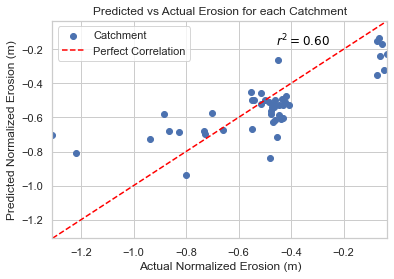

In [14]:
#make a data frame from y_test and predictions
df = pd.DataFrame(y_test)
#name the column y_field
df[y_field] = y_test
df['predictions'] = predictions
#plot the predictions vs y_test so x and y are the same

#get the correlation between the predictions and y_test
correlation = df[y_field].corr(df['predictions'])
print(f"Correlation: {correlation}")

print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.scatter(df[y_field], df['predictions'])
plt.xlabel('Actual Normalized Erosion (m)')
plt.ylabel('Predicted Normalized Erosion (m)')
#set axis to be the same bounds
plt.xlim(min(df[y_field]), max(df[y_field]))
plt.ylim(min(df[y_field]), max(df[y_field]))
#plot a perfect correlation line
plt.plot([min(df[y_field]), max(df[y_field])], [min(df[y_field]), max(df[y_field])], color='red', linestyle='--')
plt.title('Predicted vs Actual Erosion for each Catchment')
#add the r^2 to the plot legend, formatted to 2 decimal places
#also add the perfect correlation line
r2 = round(correlation**2, 2)
#make r^2 with the exponent
# Ensure you have defined the appropriate y_field in your DataFrame
y_min = min(df[y_field])
y_max = max(df[y_field])
x_min = min(df['predictions'])
x_max = max(df['predictions'])
x_position = x_min + 0.6 * (x_max - x_min)
y_position = y_max - 0.05 * (y_max - y_min)
plt.text(x_position, y_position, r"$r^2=    {:.2f}$".format(r2), fontsize=12, fontweight='bold',
         verticalalignment='top', horizontalalignment='left', color='black')

plt.legend(['Catchment', 'Perfect Correlation'])

plt.show()

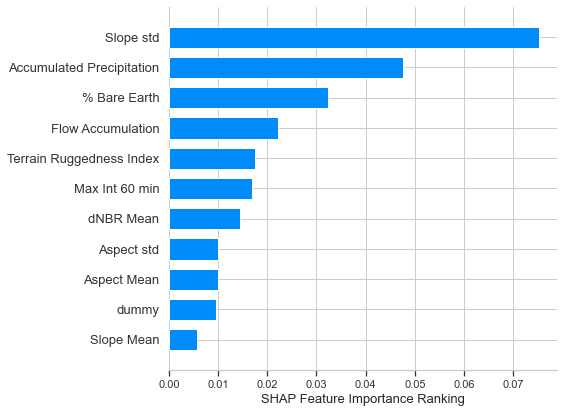

Recursive feature elimination: 
                       Feature  Ranking
2                   Slope std        1
5                % Bare Earth        1
7   Accumulated Precipitation        1
8    Terrain Ruggedness Index        1
9           Flow Accumulation        1
6              Max Int 60 min        2
0                   dNBR Mean        3
1                  Slope Mean        4
4                  Aspect std        5
10                      dummy        6
3                 Aspect Mean        7


In [36]:
directional = evaluate_model_with_shap(model, X_train, X_test)

features = recursive_feature_elimination(X, y, n_features_to_select=5)
print(f"Recursive feature elimination: \n {features}")

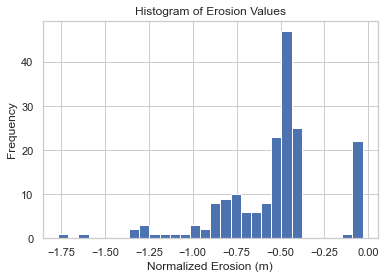

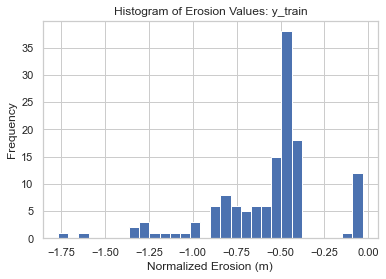

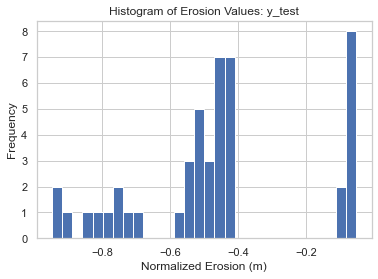

In [43]:
#plot histogram of y values
plt.hist(y, bins=30)
#display y field values
plt.xlabel('Normalized Erosion (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Erosion Values')
plt.show()

plt.hist(y_train, bins=30)
#display y field values
plt.xlabel('Normalized Erosion (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Erosion Values: y_train')
plt.show()
plt.hist(y_test, bins=30)
#display y field values
plt.xlabel('Normalized Erosion (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Erosion Values: y_test')
plt.show()

In [44]:
#display y values as a table
print(y)

0     -0.057186
1     -0.060128
2     -0.065898
3     -0.070247
4     -0.060129
         ...   
176   -0.451416
177   -0.416309
178   -0.414893
179   -0.435645
180   -0.406787
Name: Erosion Volsum over count, Length: 181, dtype: float64


Mean Squared Error: 0.07476258984971751


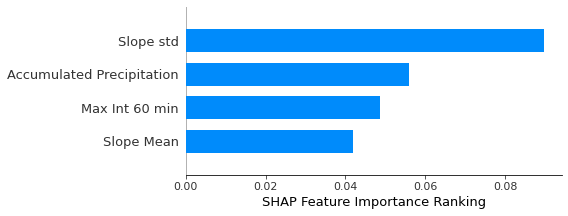

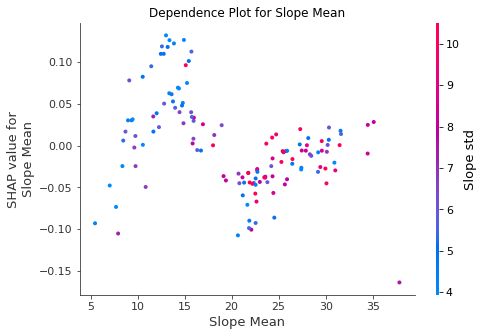

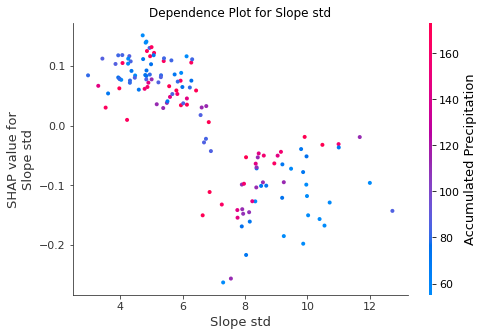

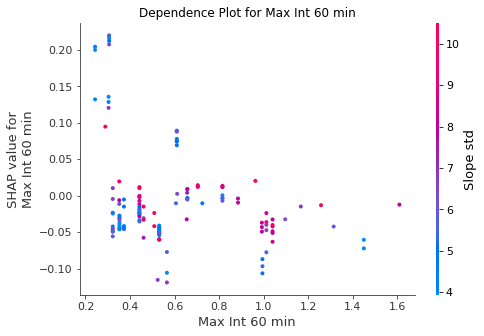

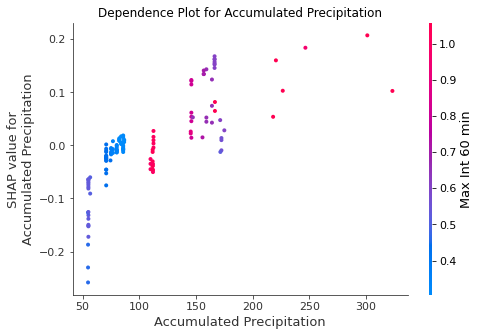

In [61]:

model = RandomForestRegressor(n_estimators=350, max_depth=18, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

rfut.evaluate_model(model, X_test, y_test)
# Evaluate the model with SHAP
evaluate_model_with_shap(model, X_train, X_test)
# get feature labels
feature_labels = X.columns

for feature in feature_labels:
    # Create a pdp plot for each feature
    evaluate_feature_with_shap(model, X_train, X_test, feature)
    #plt.show()



In [62]:
features = recursive_feature_elimination(X, y, n_features_to_select=5)

# Record the top 5 features
top_features = features['Feature'].values[:5]

                     Feature  Ranking
0                 Slope Mean        1
1                  Slope std        1
2             Max Int 60 min        1
3  Accumulated Precipitation        1


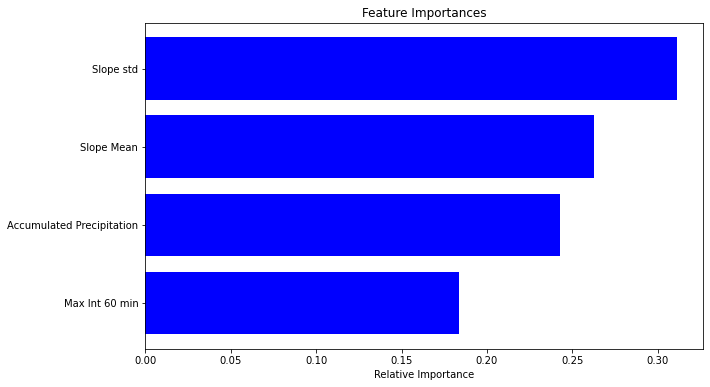

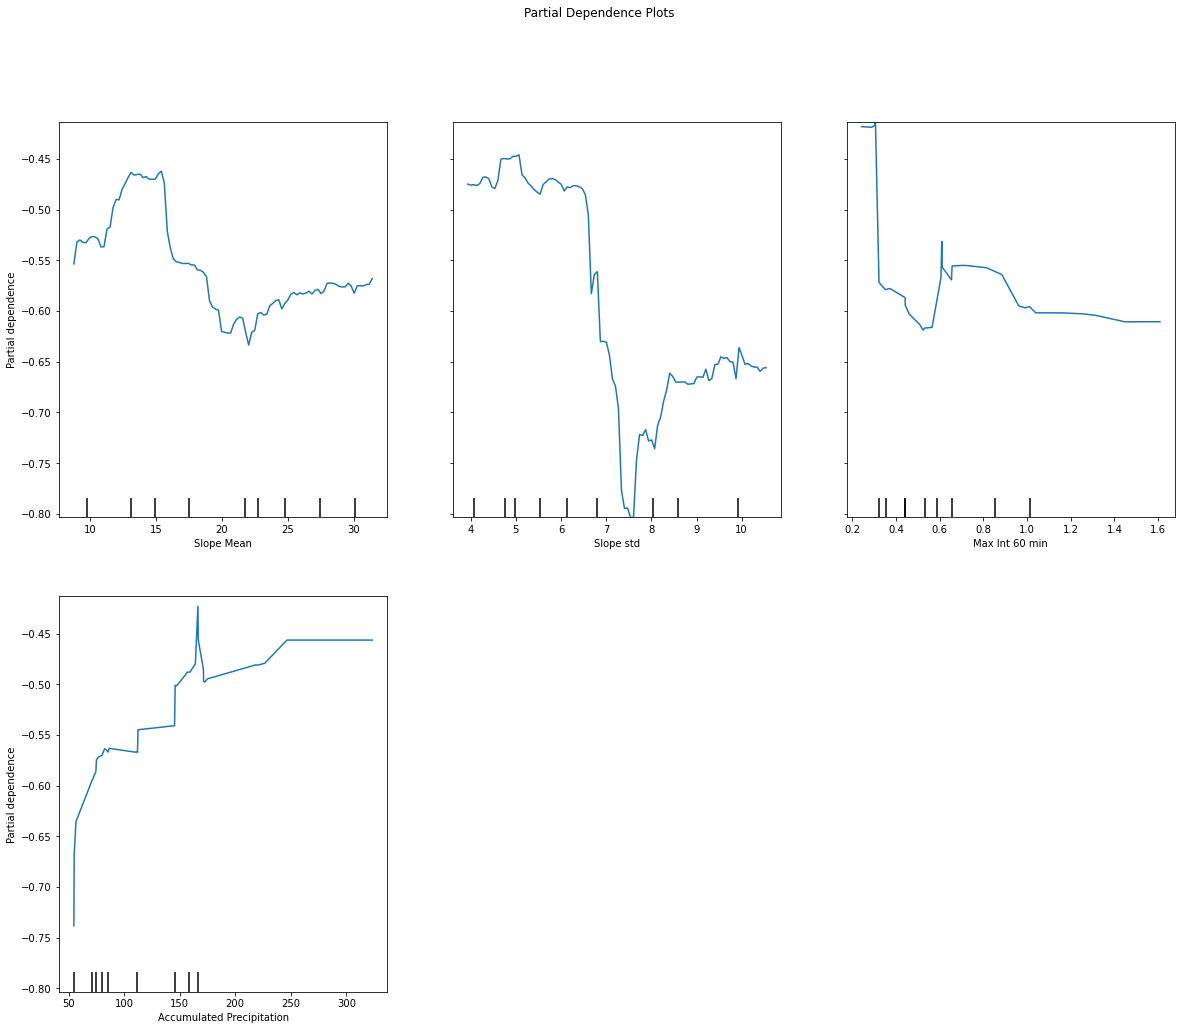

In [63]:
rfut.plot_feature_importances(model, X.columns)

feature_list = range(0, len(X.columns))
rfut.partial_dependence_plots(model, X_train, feature_list)

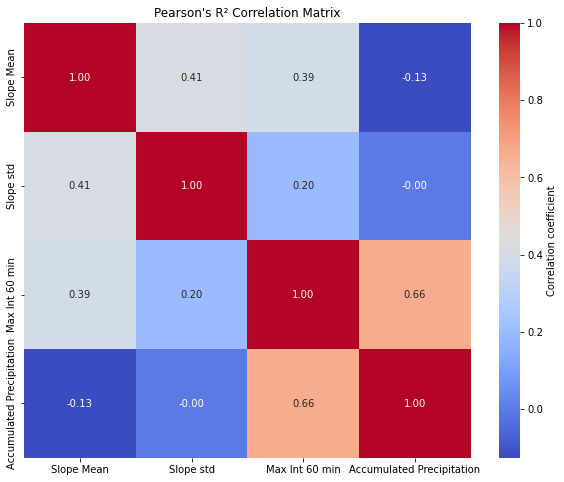

,Slope Mean,Slope std,Max Int 60 min,Accumulated Precipitation
Slope Mean,1.000000,0.410843,0.388992,-0.126584
Slope std,0.410843,1.000000,0.195128,-0.003479
Max Int 60 min,0.388992,0.195128,1.000000,0.661864
Accumulated Precipitation,-0.126584,-0.003479,0.661864,1.000000


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix_table(features_df):
    """
    Calculate and display a correlation matrix with Pearson's R^2 for all features.

    Parameters:
    - features_df (pd.DataFrame): DataFrame containing all the features.

    Returns:
    - Displays a heatmap of the correlation matrix.
    """
    # Calculate the Pearson correlation matrix
    corr_matrix = features_df.corr()
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
    plt.title("Pearson's R² Correlation Matrix")
    plt.show()

    return corr_matrix

correlation_matrix_table(X_train)

In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def feature_impact_analysis(X, y, random_state=42):
    """
    Evaluate the impact of each feature on the RandomForestRegressor model performance.
    Both R^2 and MSE are calculated for each feature removal to assess impact.

    Args:
    X (DataFrame): The feature matrix.
    y (Series): The target variable.
    random_state (int): Seed for the random number generator for reproducibility.

    Returns:
    DataFrame: A DataFrame with each feature and the resulting R^2 and MSE when that feature is removed.
    """
    results = []
    original_features = X.columns.tolist()
    # Split the data to ensure fair evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Train a model with all features to establish baseline performance
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    baseline_r2 = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    baseline_mse = mean_squared_error(y_test, predictions)
    
    # Iterate over each feature to be removed and retrain the model
    for feature in original_features:
        X_train_reduced = X_train.drop(columns=[feature])
        X_test_reduced = X_test.drop(columns=[feature])
        
        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_reduced, y_train)
        reduced_predictions = model.predict(X_test_reduced)
        
        r2_score_reduced = model.score(X_test_reduced, y_test)
        mse_reduced = mean_squared_error(y_test, reduced_predictions)
        
        results.append({'Feature': feature,
                        'R^2 Score': r2_score_reduced,
                        'R^2 Drop': baseline_r2 - r2_score_reduced,
                        'MSE': mse_reduced,
                        'MSE Increase': mse_reduced - baseline_mse})
    
    return pd.DataFrame(results).sort_values(by='MSE Increase', ascending=False)

# Assuming X and y are defined as your feature set and target variable respectively
impact_df = feature_impact_analysis(X, y)
print(impact_df)


                     Feature  R^2 Score  R^2 Drop       MSE  MSE Increase
0                 Slope Mean   0.379872  0.111182  0.056880      0.010198
3  Accumulated Precipitation   0.390655  0.100398  0.055891      0.009209
2             Max Int 60 min   0.437955  0.053098  0.051552      0.004870
1                  Slope std   0.569213 -0.078160  0.039513     -0.007169
